In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
df = pd.read_csv('ourdata/dataset_session_799864342.csv')

In [3]:
df

,stimulus_presentation_id,unit_id,temporal_frequency,orientation,spikes_per_second,area
0,3798,951087020,4.0,135.0,9.991457,CA1
1,3798,951087105,4.0,135.0,19.483342,CA1
2,3798,951087261,4.0,135.0,5.495302,CA1
3,3798,951087291,4.0,135.0,11.490176,CA1
4,3798,951087330,4.0,135.0,0.999146,CA1
...,...,...,...,...,...,...
321784,49432,951108207,8.0,0.0,3.996663,VISrl
321785,49432,951108231,8.0,0.0,2.997497,VISrl
321786,49432,951108474,8.0,0.0,5.495411,CA1
321787,49432,951108512,8.0,0.0,1.498749,VISrl


we start our analysis by looking at if we have duplicates and nan values and if the data is of the type we need for our analysis (i.e. numerical values)

In [4]:
print(df.duplicated().sum())

0


In [5]:
print(df.isnull().sum())

stimulus_presentation_id        0
unit_id                         0
temporal_frequency          14803
orientation                 14803
spikes_per_second               0
area                            0
dtype: int64


we see that only spatial_frequency and temporal_frequency contain nan values. let's see if they correspond to the same experiments all the time or we can have also some cases in which one is 0 and the other one is not. 

In [7]:
both_nan = df[df['orientation'].isna() & df['temporal_frequency'].isna()]
print(f"Rows where both are NaN: {len(both_nan)}")

Rows where both are NaN: 14803


we see that they are always nan at the same time. For our purpose this datapoints are useless so we can delete them.

In [9]:
df = df.dropna(subset=['orientation', 'temporal_frequency'])

In [10]:
print(df.dtypes)

stimulus_presentation_id      int64
unit_id                       int64
temporal_frequency          float64
orientation                 float64
spikes_per_second           float64
area                         object
dtype: object


In [11]:
print(df.describe())

       stimulus_presentation_id       unit_id  temporal_frequency  \
count             306986.000000  3.069860e+05       306986.000000   
mean               29248.913051  9.510981e+08            5.964409   
std                18652.074535  6.024483e+03            5.092336   
min                 3798.000000  9.510870e+08            1.000000   
25%                 3960.000000  9.510935e+08            2.000000   
50%                31116.000000  9.510985e+08            4.000000   
75%                49270.000000  9.511032e+08            8.000000   
max                49432.000000  9.511085e+08           15.000000   

         orientation  spikes_per_second  
count  306986.000000      306986.000000  
mean      157.530930          10.690328  
std       103.069468          12.108288  
min         0.000000           0.499560  
25%        45.000000           2.497914  
50%       180.000000           6.494772  
75%       270.000000          13.988390  
max       315.000000         137.883488  


We are focusing on the drifting_gratings as stimuli. 
Each drifting_gratings has two main characteristics which are spatial_frequency and temporal_frequency. 
Let's look at the possible values this features can take.

In [12]:
print("STATIC GRATINGS")
print('Possible values:')
print(' - Orientation: ', df['orientation'].unique())
print(' - Temporal_frequency: ', df['temporal_frequency'].unique())

STATIC GRATINGS
Possible values:
 - Orientation:  [135.  45.   0. 270.  90. 180. 315. 225.]
 - Temporal_frequency:  [ 4. 15.  1.  8.  2.]


let's now see how many datapoints we have of each values of temporal frequency

<Axes: xlabel='temporal_frequency', ylabel='count'>

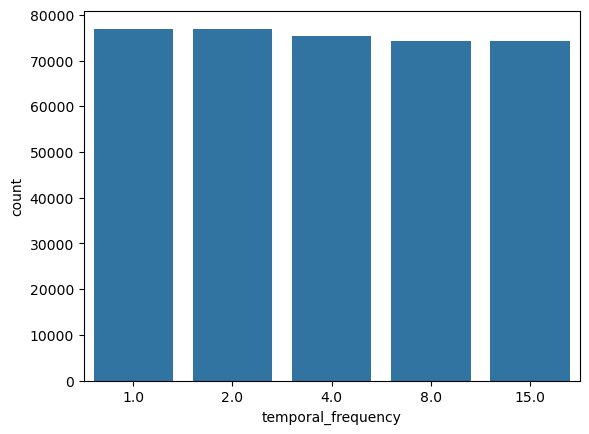

In [110]:
sns.countplot(x='temporal_frequency', data=df)

<Axes: xlabel='orientation', ylabel='count'>

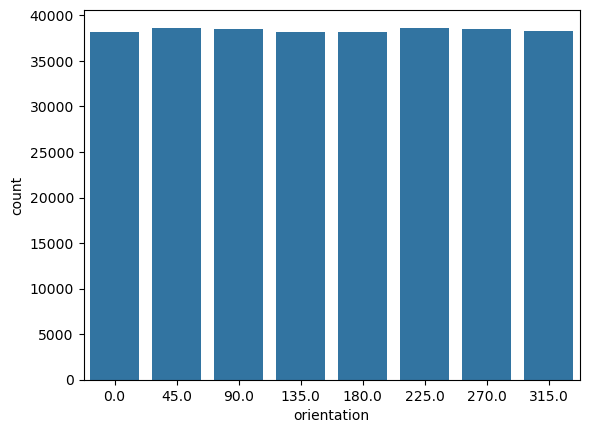

In [13]:
sns.countplot(x='orientation', data=df)

As we can see we have a almost equal number of counts for each value.

let's now look at the distribution of the spikes per second 

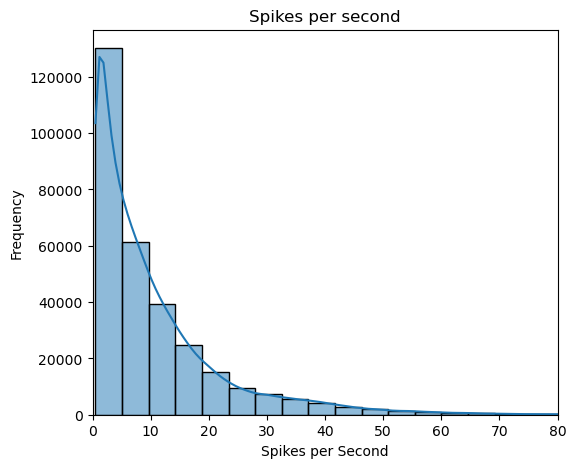

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['spikes_per_second'], kde=True, bins=30, ax=ax)

ax.set_title("Spikes per second")
ax.set_xlabel("Spikes per Second")
ax.set_ylabel("Frequency")
ax.set_xlim(left=0, right=80)  

plt.show()


We see that the distribution is highly skewed to the left. This means that we have lots of neurons which has a few number of spikes per second. 

In order to reduce this we try to apply log tranformation, square root transformation and box-cox transformation.

/var/folders/l5/l2yq9xlj55l1p5qsn5c6n5wh0000gn/T/ipykernel_30014/796075533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_spikes"] = np.log1p(df["spikes_per_second"])


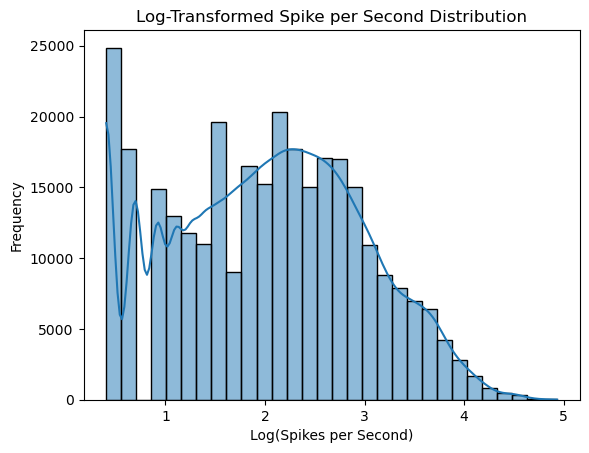

In [15]:
df["log_spikes"] = np.log1p(df["spikes_per_second"])  
sns.histplot(df["log_spikes"], kde=True, bins=30)
plt.title("Log-Transformed Spike per Second Distribution")
plt.xlabel("Log(Spikes per Second)")
plt.ylabel("Frequency")
plt.show()


/var/folders/l5/l2yq9xlj55l1p5qsn5c6n5wh0000gn/T/ipykernel_30014/2878684884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sqrt_spikes"] = np.sqrt(df["spikes_per_second"])


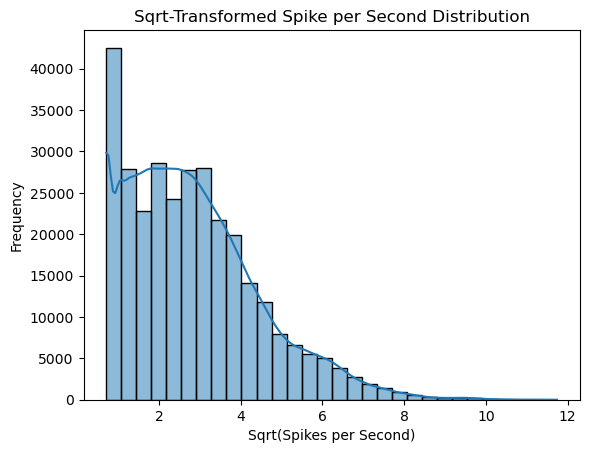

In [16]:
df["sqrt_spikes"] = np.sqrt(df["spikes_per_second"])
sns.histplot(df["sqrt_spikes"], kde=True, bins=30)
plt.title("Sqrt-Transformed Spike per Second Distribution")
plt.xlabel("Sqrt(Spikes per Second)")
plt.ylabel("Frequency")
plt.show()

/var/folders/l5/l2yq9xlj55l1p5qsn5c6n5wh0000gn/T/ipykernel_30014/3478809398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["boxcox_spikes"], _ = stats.boxcox(df["spikes_per_second"])


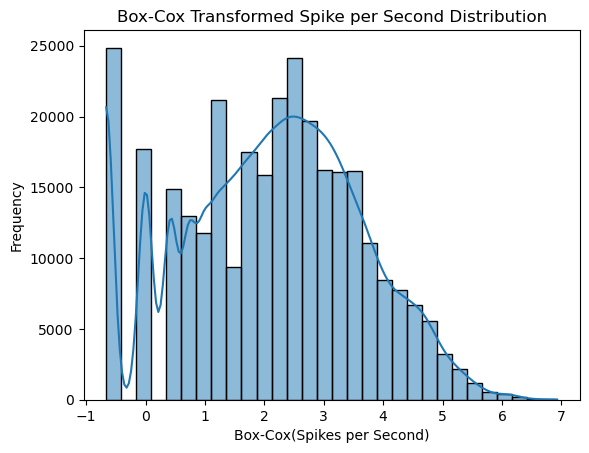

In [17]:
df["boxcox_spikes"], _ = stats.boxcox(df["spikes_per_second"])
sns.histplot(df["boxcox_spikes"], kde=True, bins=30)
plt.title("Box-Cox Transformed Spike per Second Distribution")
plt.xlabel("Box-Cox(Spikes per Second)")
plt.ylabel("Frequency")
plt.show()


We notice that in the cases of log and box-cox transformation we have a better distribution that almost looks like a normal. The better one is the one of the log transformation, so we will keep this one.

In [18]:
df.drop(columns=[ "sqrt_spikes", "boxcox_spikes"], inplace=True)

/var/folders/l5/l2yq9xlj55l1p5qsn5c6n5wh0000gn/T/ipykernel_30014/3734111208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[ "sqrt_spikes", "boxcox_spikes"], inplace=True)


Let's now look better at the structure of the data using a boxplot.

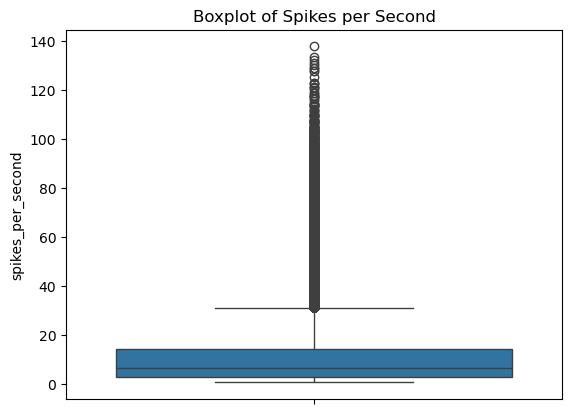

In [19]:
sns.boxplot(y=df["spikes_per_second"])
plt.title("Boxplot of Spikes per Second")
plt.show()


as we can see we have a big concentration of points in the range 0-20 and lots of outliers with values larger.

## correlation

We now look at the correlation between temporal frequency and spikes per second 

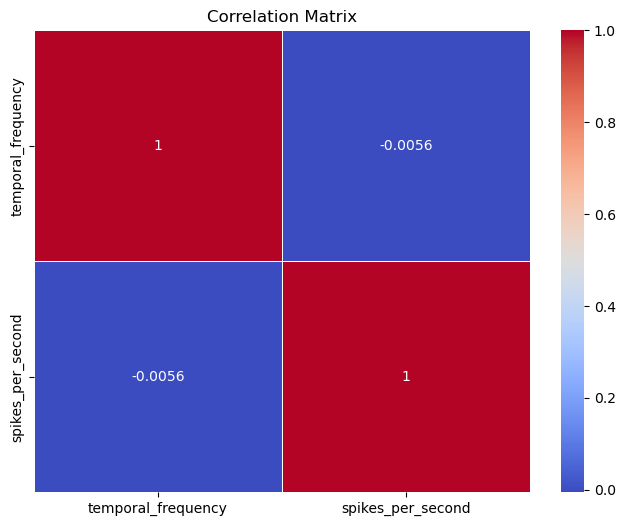

In [20]:
correlation_matrix = df[['temporal_frequency', 'spikes_per_second']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


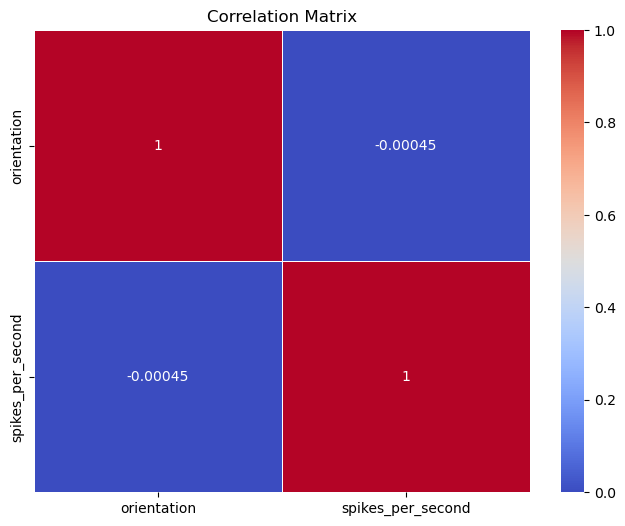

In [22]:
correlation_matrix = df[['orientation', 'spikes_per_second']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


as we can see we don't have direct linear relationship between the orientation and the spikes per second and between the temporal frequency and the spikes per second. What we want to prove is in fact is that a certain orientation and temporal frequency causes a different effect in each part of the brain.

## analysis of areas structure

We now focus on analysis the areas we will consider. What we want to see in particular is if each neuron of the area has similar reaction to a certain stimulus.